# Import libraries

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load data

In [183]:
train_df = pd.read_csv('Titanic_train.csv')

In [184]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [186]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
train_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [188]:
train_df.duplicated().sum()

0

In [189]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
for i in train_df.isna().sum():
    print(round(i/len(train_df)*100,2),'%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
19.87 %
0.0 %
0.0 %
0.0 %
0.0 %
77.1 %
0.22 %


In [ ]:
'''
Age column contain 19.87% null value I will replace it with median because outliers are also present.
Cabin column contain 77.1% of null values so I will drop this column due to excessive missing data.
Embarked column contain only 0.22% of null values so I will Impute with the most frequent port.
'''

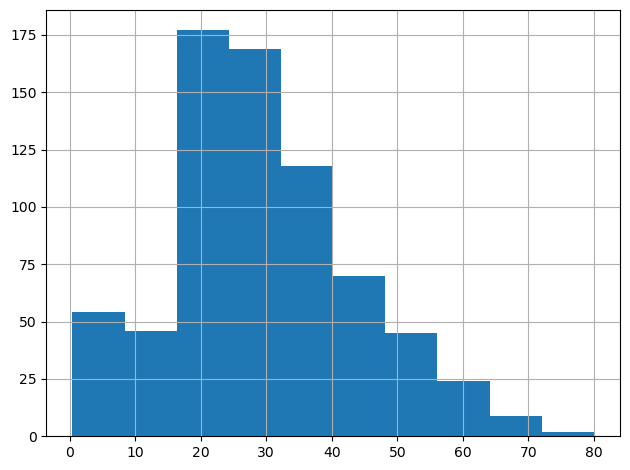

In [191]:
train_df['Age'].hist()
plt.tight_layout()
plt.show()

In [ ]:
'''
distribution is highly skewed to the left (with a long tail on the right), 
it means that the majority of passengers were younger, with fewer older passengers.
''

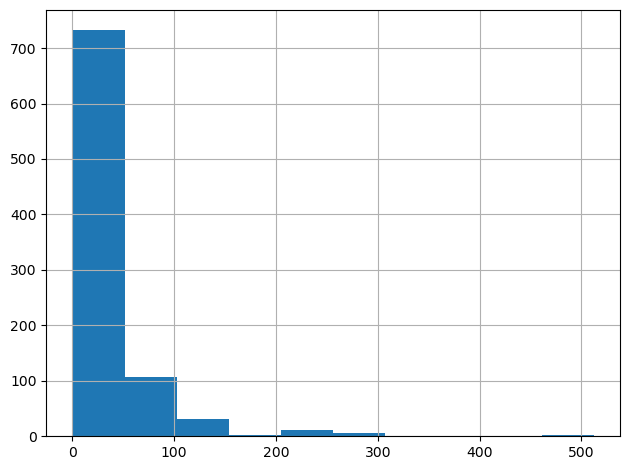

In [192]:
train_df['Fare'].hist()
plt.tight_layout()
plt.show()

In [ ]:
# as we can see skewed distribution because many passengers paying lower fares and a few paying very high fares which are outliers.

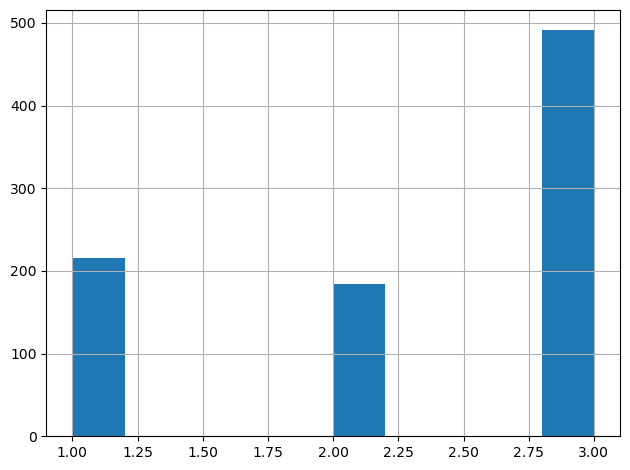

In [193]:
train_df['Pclass'].hist()
plt.tight_layout()
plt.show()

In [ ]:
#Pclass shows a categorical distribution of higher number of passengers in 3rd class , 2nd class and 1st class.

In [194]:
age_Median=train_df['Age'].median()
age_Median

28.0

In [195]:
train_df['Age']=train_df['Age'].fillna(age_Median)

In [196]:
# Replaced null values with median due to present of outliers.

In [197]:
most_frequent_port_train = train_df['Embarked'].mode()[0]

In [198]:
train_df.fillna({'Embarked' : most_frequent_port_train}, inplace = True)

In [199]:
# Imputed with most frequent port because outliers are not present. 

In [200]:
train_df.drop(columns = ['Cabin'], inplace = True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [201]:
#dropped the cabin column due to excessive missing data.

In [202]:
label_enc = LabelEncoder()
train_df['Sex'] = label_enc.fit_transform(train_df['Sex'])

In [203]:
le_encoder = LabelEncoder()
train_df['Embarked'] = label_enc.fit_transform(train_df['Embarked'])

In [204]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [205]:
#converted categorical data to numerical with LabelEncoder.

In [206]:
train_df.drop(columns = ['PassengerId', 'Name','Ticket'], inplace = True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [207]:
# Dropped PassengerId, Name, and Ticket because not useful

In [208]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 699.0 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 799.2 kB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 799.2 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 786.4 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 786.4 kB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 706.6 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 692.3 kB/s eta 0:00:00


In [31]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 762.0 kB/s eta 0:03:17
   ---------------------------------------- 0.8/150.0 MB 780.2 kB/s eta 0:03:12
   ---------------------------------------- 0.8/150.0 MB 780.2 kB/s eta 0:03:12
   ---------------------------------------- 1.0/150.0 MB 689.2 kB/s eta 0:03:37
   ---------------------------------------- 1.0/150.0 MB 689.2 kB/s eta 0:03:37
   ---------------------------------------- 1.3/150.0 MB 699.0 kB/s eta 0:03:33
   ---------------------------------------- 1.6/150.0 MB 755.5 kB/s eta 0:03:17
   ---------------------------------------- 1.6/150.0 MB 755.5 kB/s eta 0:03:17
   --

In [209]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import numpy as np

In [210]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [212]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred = (y_pred > 0.5).astype(int)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [213]:
# LightGBM Model
print("LightGBM Results")
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
evaluate_model(lgb_model, X_test, y_test)

LightGBM Results
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [214]:
# XGBoost Model
print("\nXGBoost Results")
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)


XGBoost Results
Accuracy: 0.8100558659217877
Precision: 0.7536231884057971
Recall: 0.7536231884057971
F1-score: 0.7536231884057971


C:\Users\bcs\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:01:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
'''
XGBoost has slightly higher accuracy, recall, and F1-score.
LightGBM has a bit higher precision, meaning fewer false positives.
'''

In [215]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred = (y_pred > 0.5).astype(int)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    }

In [216]:
metrics_lgb = get_metrics(lgb_model, X_test, y_test)
metrics_xgb = get_metrics(xgb_model, X_test, y_test)

In [217]:
metrics_df = pd.DataFrame([metrics_lgb, metrics_xgb], index=['LightGBM', 'XGBoost'])

In [218]:
print(metrics_df)

          Accuracy  Precision    Recall  F1-score
LightGBM  0.798883   0.761905  0.695652  0.727273
XGBoost   0.810056   0.753623  0.753623  0.753623


In [ ]:
# Bar plot for comparison of metrics

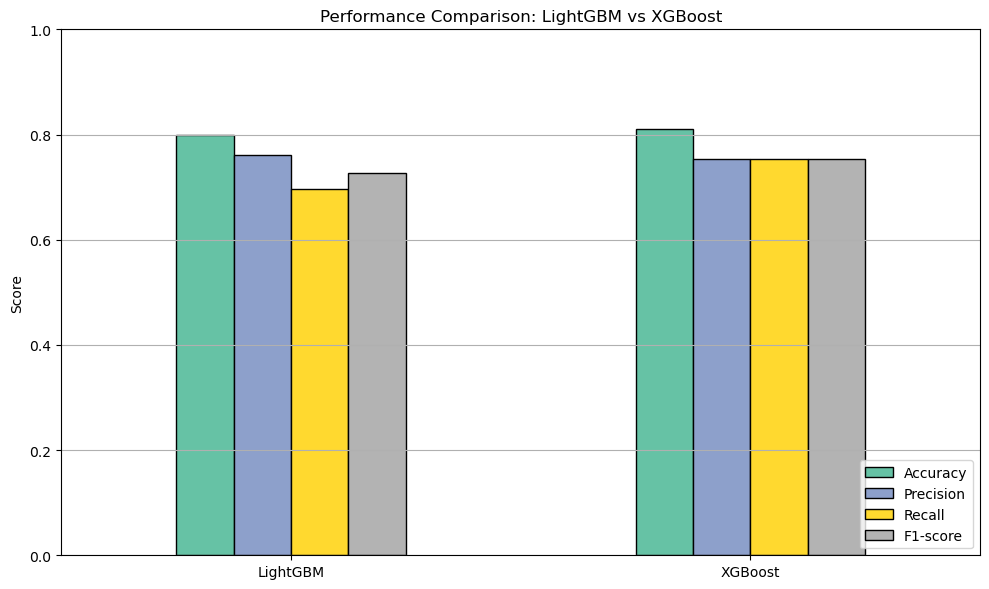

In [219]:
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
'''
XGBoost achieved higher accuracy and F1-score, suggesting it offers better balanced performance overall.

LightGBM had slightly higher precision, meaning it made fewer false positive predictions.

However, XGBoost’s higher recall indicates it was more successful in identifying actual survivors.
'''

In [ ]:
# now , loading titanic_test.csv dataset to prediction

In [220]:
test_df = pd.read_csv('Titanic_test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [221]:
age_median=test_df['Age'].median()
age_median

27.0

In [222]:
train_df['Age']=train_df['Age'].fillna(age_median)

In [223]:
fare_Median=test_df['Fare'].median()
fare_Median

14.4542

In [224]:
test_df['Fare']=test_df['Fare'].fillna(age_Median)

In [225]:
most_frequent_port_test = test_df['Embarked'].mode()[0]

In [226]:
test_df.fillna({'Embarked' : most_frequent_port_test}, inplace = True)

In [227]:
test_df.drop(columns = ['Cabin'], inplace = True)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [228]:
from sklearn.preprocessing import LabelEncoder

In [229]:
label_enc = LabelEncoder()
test_df['Sex'] = label_enc.fit_transform(test_df['Sex'])

In [230]:
le_encoder = LabelEncoder()
test_df['Embarked'] = label_enc.fit_transform(test_df['Embarked'])

In [231]:
test_df.drop(columns = ['PassengerId','Name','Ticket'], inplace = True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


In [232]:
missing_cols = set(X.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

In [233]:
test_df = test_df[X.columns]

In [234]:
model = xgb_model

In [235]:
test_predictions = model.predict(test_df)
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
'''
After training and validating the model on the Titanic_train.csv dataset, I have used it to make predictions on data from Titanic_test.csv.

The model output is an array which indicates,

0 indicates the model predicts the passenger did not survive
1 indicates the model predicts the passenger did survive.
'''